# Estudo de Caso - Ocorrências Aeronáuticas na Aviação Civil Brasileira

## Contextualização

Embora seja um meio de transporte que ainda cause receio em alguns, os aviões são considerados o segundo meio de transporte mais seguro do mundo, perdendo somente para os elevadores. Para se ter uma noção em 2021 a chance de envolver-se em uma ocorrência aeronáutica era de 1 em 990 mil. 

Suas vantagens são inúmeras, mas seu principal benefício foi conseguir conectar o mundo inteiro em pouco espaço de tempo. O avanço da aviação está intimamente ligado à globalização de uma forma geral. 

Apesar dos seus benefícios, os acidentes envolvendo aviões podem acontecer e elas podem ser causadas por falhas mecânicas ou humanas. O CENIPA (Centro de Investigação e Prevenção de Acidentes Aeronáuticos) é o órgão ligado à Força Aérea Brasileira responsável por investigar e emitir os relatórios finais a respeito de todas as ocorrências envolvendo a aviação civil brasileira. Seja em solo brasileiro ou no exterior.

## Introdução

Utilizarei nessa apresentação os dados abertos do CENIPA de 2006 a 2015 que discorrem diversas informações a respeito das ocorrências no período citado. Os dados estão divididos em 2 arquivos que relacionam-se diretamente a partir de um Código da Ocorrência. Um protocolo único de identificação que descreve a ocorrência e as aeronaves envolvidas.

Arquivo 1: 'ocorrencia.csv' descreve a ocorrência de forma objetiva, com o código da ocorrência, dia e lugar que ocorreu, espécie do acidente, quantas aeronaves envolvidas e algumas informações sobre a investigação.

Arquivo 2: 'aeronave.csv' descreve as aeronaves envolvidas nas ocorrências com fabricante, tipo de motor, ano de fabricação, capacidade, danos na aeronave, vítimas entre outros. 


Neste estudo vamos explorar cada uma das tabelas separadamente e depois buscar relacioná-las a partir de alguns cruzamentos de dados.

## Hipóteses levantadas

1 - Quais as principais causas de ocorrências nos aviões?

2 - Em que locais é mais comum ter mais ocorrências? Por quê?

3 - As ocorrências têm se tornado mais comuns ou mais raras com o tempo?

4 - Em caso de ocorrência, os danos são muito severos? Há muitas vítimas?

5 - Há alguma fase do vôo que é mais crítica para acidentes?

6 - É mais comum ter acidentes na aviação comercial ou na particular?

7 - Qual tipo de avião é mais suscetível a se envolver em acidentes?

8 - É possível identificar algum acidente de grande repercussão nos dados?

9 - Há alguma relação entre a idade do avião e os acidentes? E o fabricante? 

## Análise Exploratória

### Importar Bibliotecas

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importar Dataset

In [293]:
ocorrencias = pd.read_csv('./dataset/ocorrencia.csv')
aeronaves = pd.read_csv('./dataset/aeronave.csv')

In [37]:
ocorrencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   codigo_ocorrencia         2027 non-null   int64  
 1   classificacao             2027 non-null   object 
 2   tipo                      2027 non-null   object 
 3   localidade                2027 non-null   object 
 4   uf                        2027 non-null   object 
 5   pais                      2027 non-null   object 
 6   aerodromo                 2024 non-null   object 
 7   dia_ocorrencia            2027 non-null   object 
 8   horario                   2027 non-null   object 
 9   sera_investigada          2027 non-null   object 
 10  comando_investigador      2027 non-null   object 
 11  status_investigacao       1821 non-null   object 
 12  numero_relatorio          1821 non-null   object 
 13  relatorio_publicado       995 non-null    float64
 14  dia_publ

In [35]:
ocorrencias.head()

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,SERIPA-7,FINALIZADA,IG-209/CENIPA/2013,1.0,2014-04-07,0,1,NaN,2016-07-30
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15:10:00,SIM,SERIPA-7,FINALIZADA,A - 517/CENIPA/2016,1.0,2016-07-07,0,1,1.0,2016-07-30
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,****,2011-08-11,17:00:00,SIM,SERIPA-7,FINALIZADA,A-105/CENIPA/2012,1.0,2012-09-20,4,1,NaN,2016-07-30
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,****,2009-12-28,17:30:00,SIM,SERIPA-5,ATIVA,A DEFINIR,NaN,NaN,0,1,NaN,2016-07-30


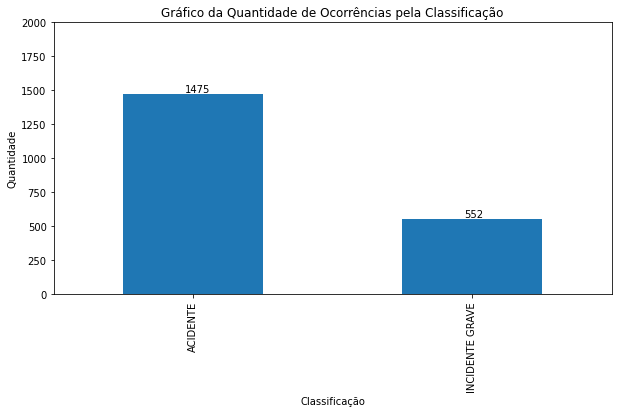

In [86]:
classificacao_ocorrencia = ocorrencias['classificacao'].value_counts().plot(kind='bar', figsize=(10,5))

for p in classificacao_ocorrencia.patches:
    b=p.get_bbox()
    classificacao_ocorrencia.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.03, b.y1 + 15))


plt.xlabel('Classificação')
plt.ylabel('Quantidade')
plt.ylim(0,2000)
plt.title('Gráfico da Quantidade de Ocorrências pela Classificação')
plt.show()

# Visualização de Acidentes por Tipo.

Os acidentes e Incidentes Graves. Acidente é quando houve uma situação em que houve prejuízo material ou pessoal. O Incidente Grave é quando teve uma grande chance de ocorrer um acidente. Apesar dessas nomenclaturas, nem sempre um acidente quando ocorre possui vitimas fatais.

Podemos visualizar as ocorrências por estados e traçar algumas conclusões a respeito.

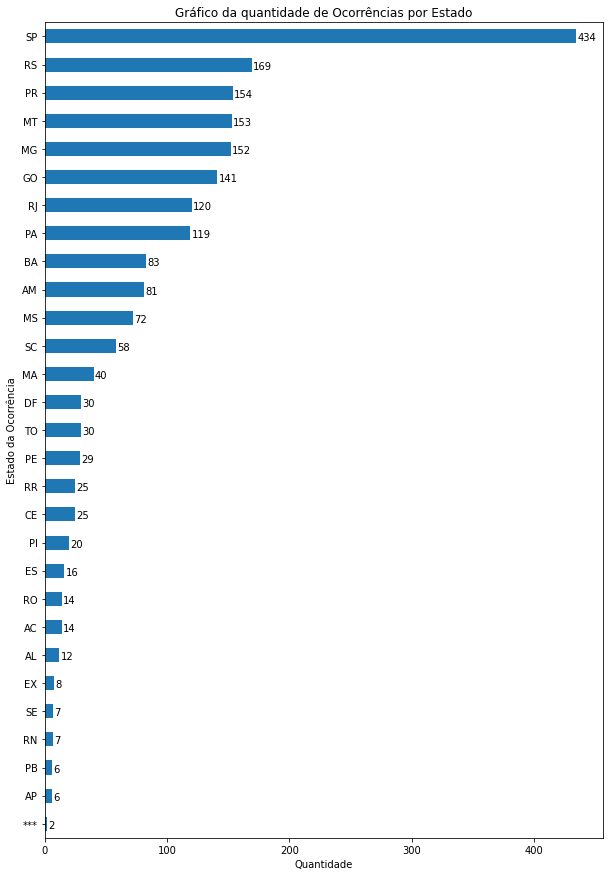

In [124]:
estado_ocorrencia = ocorrencias['uf'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10,15))

for p in estado_ocorrencia.patches:
    b=p.get_bbox()
    estado_ocorrencia.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() + 0.1))

plt.xlabel('Quantidade')
plt.ylabel('Estado da Ocorrência')
plt.title('Gráfico da quantidade de Ocorrências por Estado')
plt.show()

São Paulo por ser o estado com a maior atividade econômica do país lidera com folgas o ranking de vôos, consequentemente é o local que terá mais acidentes. Além disso é possível ver que há um 'EX' com 8 ocorrências. Trata-se das investigações do CENIPA para acidentes que ocorreram no exterior.

Podemos fazer uma análise ainda mais aprofundada vendo as cidades que têm mais ocorrências.

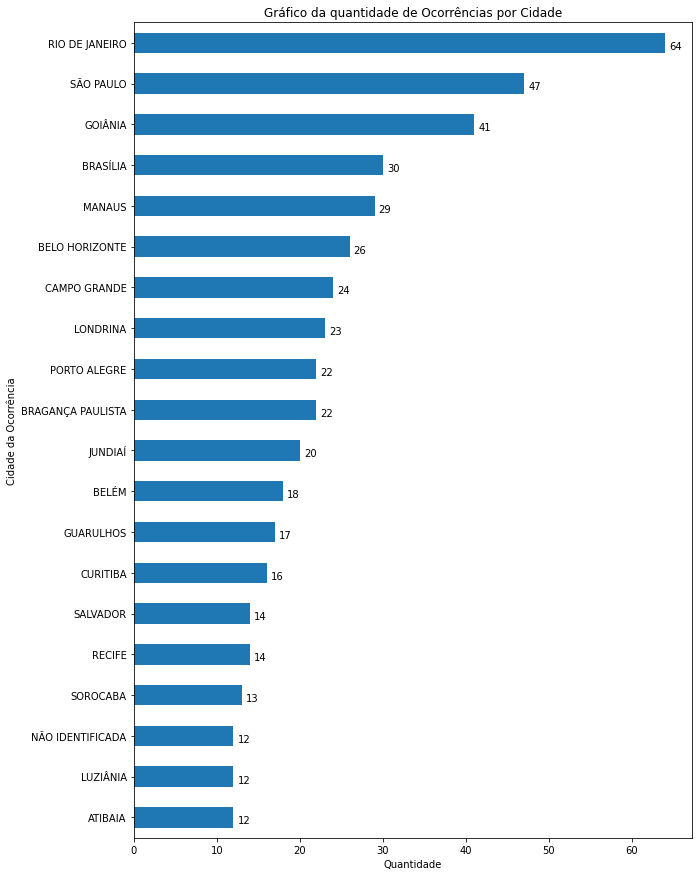

In [193]:
cidade_ocorrencia = ocorrencias['localidade'].value_counts()[0:20].sort_values(ascending=True).plot(kind='barh', figsize=(10,15))

for p in cidade_ocorrencia.patches:
    b=p.get_bbox()
    cidade_ocorrencia.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 0.5, p.get_y() + 0.1))

plt.xlabel('Quantidade')
plt.ylabel('Cidade da Ocorrência')
plt.title('Gráfico da quantidade de Ocorrências por Cidade')
plt.show()

O resultado desse gráfico nos dá uma informação bastante curiosa. Embora seja o estado que tenha mais ocorrências, é o Rio de Janeiro que lidera o ranking por cidade de ocorrências. Além disso, das 10 cidades com mais ocorrências somente São Paulo e Bragança Paulista são do estado com mais ocorrências. Isso nos permite concluir que há uma atividade aeronáutica mais distribuida pelo estado que cada município possui um número de ocorrências condizente com sua atividade. O Rio de Janeiro-RJ, se destaca em aspecto negativo pois acumula 64 das 120 ocorrências totais ocorridas no estado no período estudado, será que demandaria algum tipo de investigação mais minuciosa?


No período estudado podemos observar a quantidade de Acidentes e Incidentes.

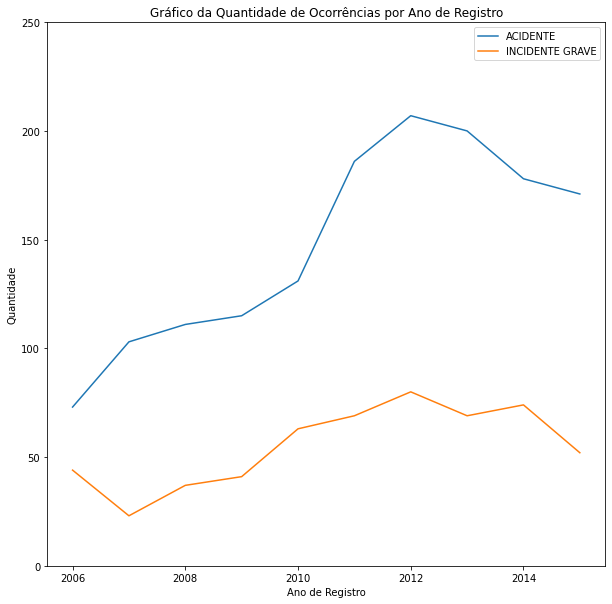

In [308]:
ocorrencias['ano_ocorrencia'] = ocorrencias['dia_ocorrencia'].apply(lambda x: x.replace(x,x[0:4]))
accident_serie = pd.Series(ocorrencias[ocorrencias['classificacao'] == 'ACIDENTE']['ano_ocorrencia'].value_counts().sort_index())
accident_serie.plot(figsize=(10,10))
incident_serie = pd.Series(ocorrencias[ocorrencias['classificacao'] == 'INCIDENTE GRAVE']['ano_ocorrencia'].value_counts().sort_index())
incident_serie.plot()

plt.title('Gráfico da Quantidade de Ocorrências por Ano de Registro')
plt.xlabel('Ano de Registro')
plt.ylabel('Quantidade')
plt.ylim(0,250)
plt.legend(['ACIDENTE', 'INCIDENTE GRAVE'])
plt.show()

Podemos perceber que com o tempo o gráfico de acidentes foi subindo e passa por uma leve queda de 2012 em diante. Esse fator pode nos levar a pensar que com o tempo os aviões vão se tornando mais tecnológicos e com menos susceptibilidade a alguns acidentes. Embora esse comportamento do gráfico assuste, posteriormente veremos que a maioria dos acidentes não têm vítimas fatais.

Um fator que pode nos ajudar a elucidar o que é causador de mais ocorrências é elencar o tipo delas.

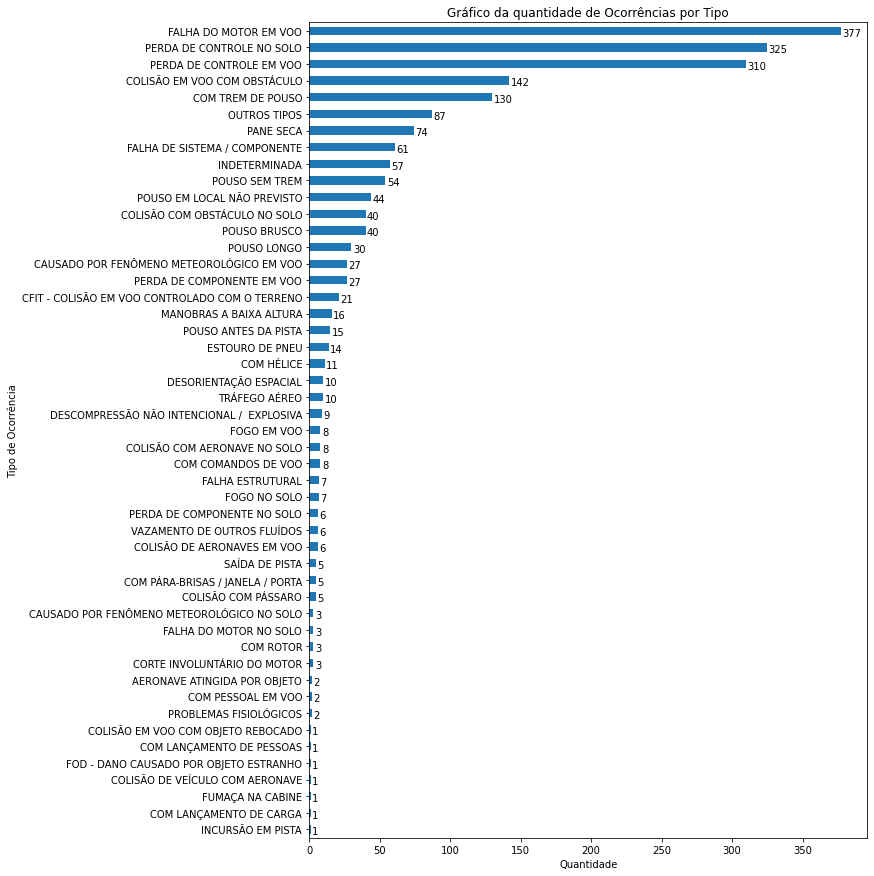

In [148]:
tipo_ocorrencia = ocorrencias['tipo'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10,15))

for p in tipo_ocorrencia.patches:
    b=p.get_bbox()
    tipo_ocorrencia.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 1, p.get_y() - 0.05))

plt.xlabel('Quantidade')
plt.ylabel('Tipo de Ocorrência')
plt.title('Gráfico da quantidade de Ocorrências por Tipo')
plt.show()

Analisando o gráfico é possível concluir que quase 50% dos acidentes são causados por falha nos motores ou perda de controle em momentos críticos do vôo. Entretanto é interessante analisar que em quase 4% dos casos houve pane seca do avião. Ou seja, faltou combustível e um acidente foi causado. Essas situações são perigosíssimas e causou graves acidentes, como o ocorrido com a Chapecoense em 2016 no voo da LaMia.

Agora vamos nos ater um pouco mais às aeronaves e estuda-las mais a fundo nos gráficos.

In [194]:
aeronaves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   codigo_aeronave         2043 non-null   int64  
 1   codigo_ocorrencia       2043 non-null   int64  
 2   matricula               2043 non-null   object 
 3   codigo_operador         2043 non-null   int64  
 4   equipamento             2043 non-null   object 
 5   fabricante              2043 non-null   object 
 6   modelo                  2043 non-null   object 
 7   tipo_motor              2043 non-null   object 
 8   quantidade_motores      2034 non-null   float64
 9   peso_maximo_decolagem   2043 non-null   int64  
 10  quantidade_assentos     2025 non-null   float64
 11  ano_fabricacao          2039 non-null   float64
 12  pais_registro           2043 non-null   object 
 13  categoria_registro      2043 non-null   object 
 14  categoria_aviacao       2043 non-null   

In [195]:
aeronaves.head()

,codigo_aeronave,codigo_ocorrencia,matricula,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
0,4,45602,PPGXE,241,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SDPW,SDPW,INDETERMINADA,INSTRUÇÃO,SUBSTANCIAL,NaN,2016-07-30
1,40,53551,PPGSZ,160,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,56-C,PISTÃO,1.0,660,...,BRASIL,PRI,INSTRUÇÃO,SBBP,SBBP,DECOLAGEM,INSTRUÇÃO,LEVE,NaN,2016-07-30
2,118,43721,PTCMT,1232,AVIÃO,BEECH AIRCRAFT,95-B55,PISTÃO,2.0,2310,...,BRASIL,TPX,TÁXI AÉREO,****,****,CORRIDA APÓS POUSO,TÁXI AÉREO,SUBSTANCIAL,NaN,2016-07-30
3,130,35556,PTEQI,3992,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-721C,PISTÃO,1.0,1633,...,BRASIL,TPP,PARTICULAR,SNDU,SBSL,CORRIDA APÓS POUSO,PRIVADA,LEVE,NaN,2016-07-30
4,191,32579,PPVMM,4365,AVIÃO,BOEING COMPANY,737-241,JATO,2.0,52389,...,BRASIL,TPR,REGULAR,****,****,SUBIDA,REGULAR,NENHUM,NaN,2016-07-30


Se observarmos o arquivo 'aeronaves.csv' possui 2043 linhas, enquanto 'ocorrencias.csv' possui 2027. Uma divergência de 16 ocorrencias. Essa eventual divergência se dá pois para um acidente que envolve mais que 1 aeronave é dado o mesmo código de ocorrência. Ao somarmos as aeronaves envolvidas teremos as 16 ocorrências.

Poderemos provar essa hipótese no teste abaixo.

In [224]:
np.array_equal(ocorrencias[ocorrencias['aeronaves_envolvidas'] > 1]['codigo_ocorrencia']
               .sort_values(ascending=True).unique(),
               aeronaves[aeronaves['codigo_ocorrencia'].duplicated()]['codigo_ocorrencia']
               .sort_values(ascending=True).unique())


True

Utilizando o comparador de arrays nativo do numpy podemos comparar se as ocorrencias com mais que 1 aeronave são as mesmas que estão duplicadas na tabela de aeronaves. Portanto, a hipótese é verdadeira.


Nesse momento vamos investigar as aeronaves a partir de diversos aspectos e traçar algumas conclusões quanto às ocorrências. Utilizando diversos subplots, vamos gerar visualizações sobre a natureza dos motores das aeronaves, os danos sofridos e os tipos de aeronaves envolvidas em acidentes.

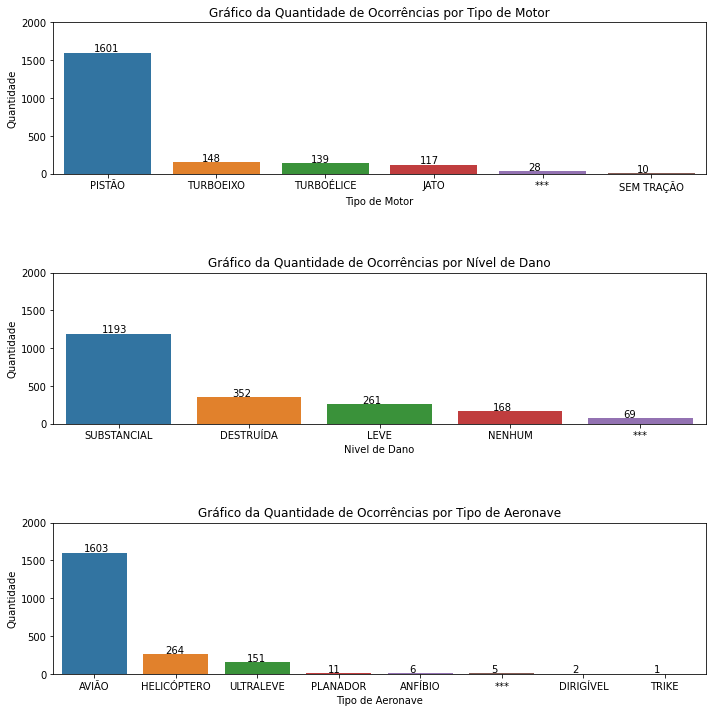

In [299]:
fig, axes = plt.subplots(3, 1, figsize=(10,10))
tipo_motor = sns.countplot(x=aeronaves['tipo_motor'], order=aeronaves['tipo_motor'].value_counts().index, ax=axes[0])
for p in tipo_motor.patches:
    b=p.get_bbox()
    tipo_motor.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.13, b.y1 + 15))
axes[0].set_title('Gráfico da Quantidade de Ocorrências por Tipo de Motor')
axes[0].set_xlabel('Tipo de Motor')
axes[0].set_ylabel('Quantidade')
axes[0].set_ylim(0,2000)
plt.tight_layout(h_pad=5.0)
    
nivel_dano = sns.countplot(x=aeronaves['nivel_dano'], order=aeronaves['nivel_dano'].value_counts().index, ax=axes[1])
for p in nivel_dano.patches:
    b=p.get_bbox()
    nivel_dano.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.13, b.y1 + 15))
axes[1].set_title('Gráfico da Quantidade de Ocorrências por Nível de Dano')
axes[1].set_xlabel('Nivel de Dano')
axes[1].set_ylabel('Quantidade')
axes[1].set_ylim(0,2000)
plt.tight_layout(h_pad=5.0)

equipamento_utilizado = sns.countplot(x=aeronaves['equipamento'], order=aeronaves['equipamento'].value_counts().index, ax=axes[2])
for p in equipamento_utilizado.patches:
    b=p.get_bbox()
    equipamento_utilizado.annotate("{:.0f}".format(b.y1 + b.y0), ((b.x0 + b.x1)/2 - 0.13, b.y1 + 15))
axes[2].set_title('Gráfico da Quantidade de Ocorrências por Tipo de Aeronave')
axes[2].set_xlabel('Tipo de Aeronave')
axes[2].set_ylabel('Quantidade')
axes[2].set_ylim(0,2000)
plt.tight_layout(h_pad=5.0)

Se verificarmos a natureza dos motores, os aviões a pistão vão liderar com folga em relação aos demais. ISso acontece por ser a tecnologia mais utilizada em aeronaves. Algo que aparece nos dados é sobre os danos causados pelos acidentes. Cerca de 50% são danos substanciais e 15% dão às aeronaves total destruição. Ou seja, há bastante chance de se ter grandes prejuízos materiais quando se envolve em acidentes aeronáuticos.

Os aviões são a grande maioria dos acidentes registrados pelo CENIPA, pois também sua quantidade é bem maior que a dos demais meios de transporte aéreo citados no dataset.


O código a seguir é feito para ver o ano de fabricação das aeronaves. Aquelas que não dispõem disso são substituidas por NaN.

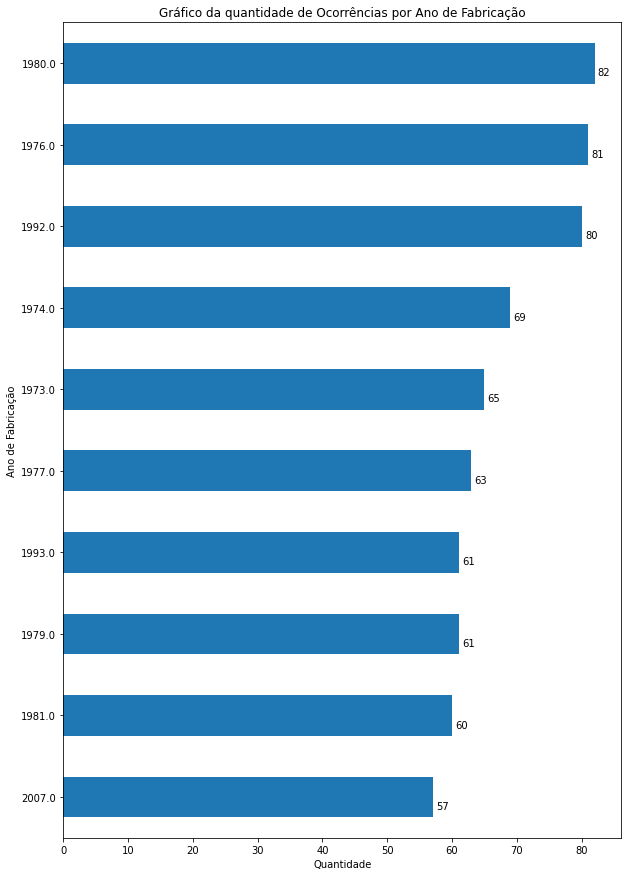

In [268]:
aeronaves['ano_fabricacao'].replace(0, np.nan, inplace=True)
ano_fabricacao = aeronaves['ano_fabricacao'].value_counts().iloc[0:10].sort_values(ascending=True).plot(kind='barh', figsize=(10,15))

for p in ano_fabricacao.patches:
    b=p.get_bbox()
    ano_fabricacao.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 0.5, p.get_y() + 0.1))

plt.xlabel('Quantidade')
plt.ylabel('Ano de Fabricação')
plt.title('Gráfico da quantidade de Ocorrências por Ano de Fabricação')
plt.show()

A partir do gráfico acima podemos afirmar que o ano de fabricação está relacionado com a suceptibilidade de um avião se envolver em um acidente. Considere-se que os dados são de 2006 a 2015, porém a exceção do ano de 2007 o modelo mais novo dos aviões no top 10 em acidentes é do ano de 1993. 

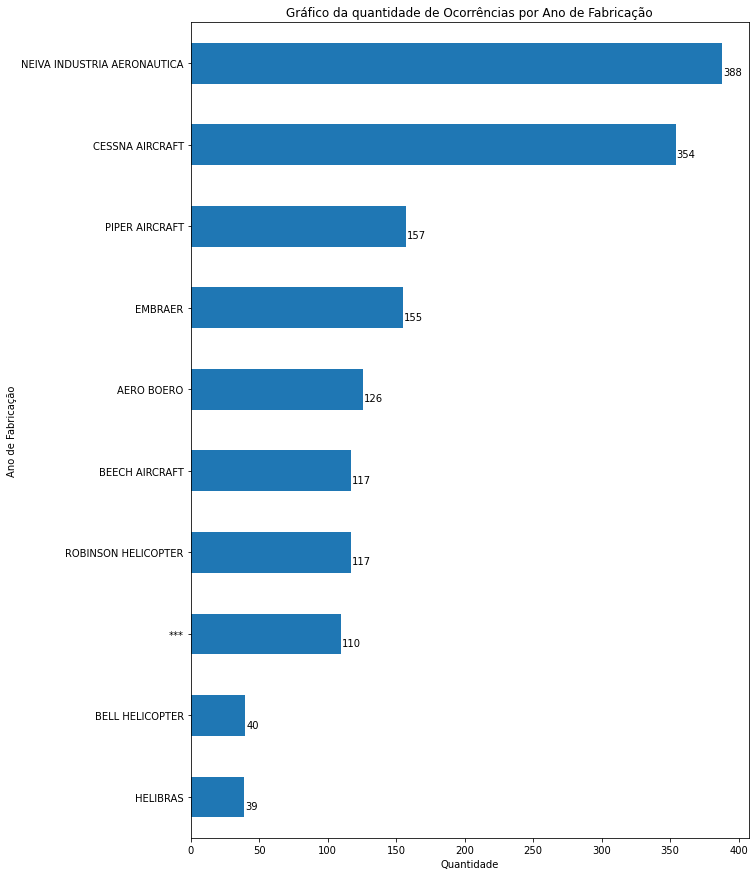

In [305]:
fabricante = aeronaves['fabricante'].value_counts().iloc[0:10].sort_values(ascending=True).plot(kind='barh', figsize=(10,15))

for p in fabricante.patches:
    b=p.get_bbox()
    fabricante.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 0.5, p.get_y() + 0.1))

plt.xlabel('Quantidade')
plt.ylabel('Fabricante')
plt.title('Gráfico da quantidade de Ocorrências por Fabricante')
plt.show()

A partir do gráfico acima dos fabricantes envolvidos em ocorrências é possível perceber que há uma relação. A Neiva foi uma fabricante de aviões de 1954 que posteriormente foi adquirida pela Embraer. Ela fabricava diversos monomotores a pistão. Isso corrobora com os motores a pistão estarem envolvidos em cerca de 80% das ocorrências.


É possível traçar a quantidade de acidentes por fase do vôo. E entender se há um momento mais crítico para que uma ocorrência ocorra.

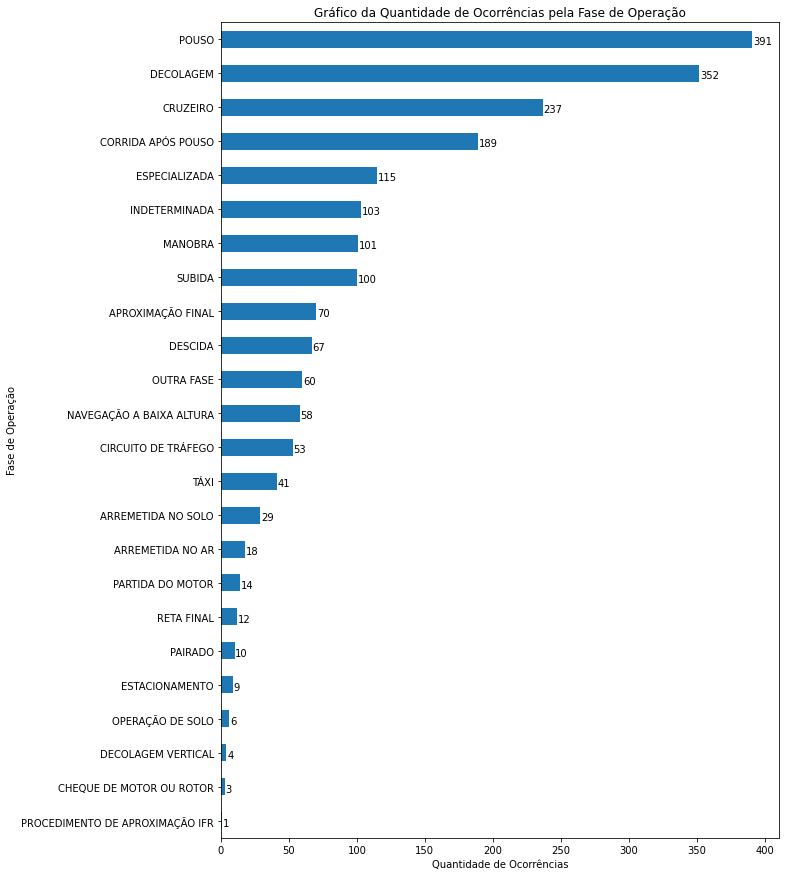

In [302]:
fase_operacao = aeronaves['fase_operacao'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10,15))

for p in fase_operacao.patches:
    b=p.get_bbox()
    fase_operacao.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 0.5, p.get_y() + 0.1))

plt.xlabel('Quantidade de Ocorrências')
plt.ylabel('Fase de Operação')
plt.title('Gráfico da Quantidade de Ocorrências pela Fase de Operação')
plt.show()

Percebe-se, portanto, que a decolagem e o pouso são os momentos mais críticos para acidentes. Pois cerca de 36% das ocorrências são nessas 2 fases.

Podemos também visualizar se os aviões de alguma determinada categoria envolvem em mais acidentes. Seja ela comercial regular, particular, instrução ou outras.

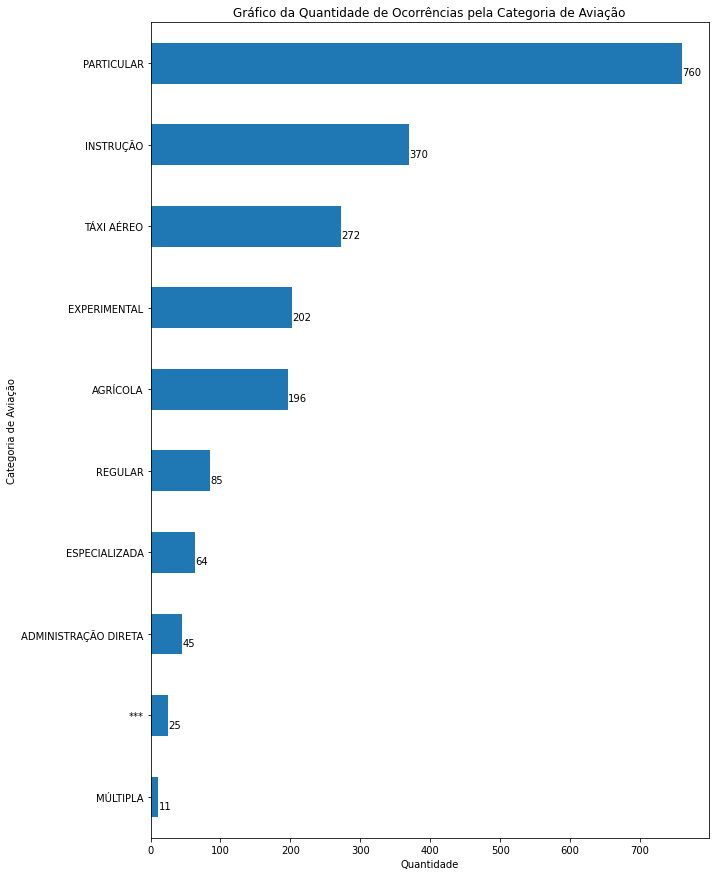

In [271]:
categoria = aeronaves['categoria_aviacao'].value_counts().iloc[0:10].sort_values(ascending=True).plot(kind='barh', figsize=(10,15))

for p in categoria.patches:
    b=p.get_bbox()
    categoria.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 0.5, p.get_y() + 0.1))

plt.xlabel('Quantidade')
plt.ylabel('Categoria de Aviação')
plt.title('Gráfico da Quantidade de Ocorrências pela Categoria de Aviação')
plt.show()

É possível concluir diversas coisas a partir do gráfico com a categoria de aviação. A aviação particular e de instrução dispõe, em sua maioria, de aviões menos robustos e antigos. Desse modo é mais suscetível a se envolver em acidentes. Entretanto há também questões de falha humana, por exemplo, a manutenção dos aviões. Algo que é mais raro de acontecer em aviação comercial.

Observando a coluna 'quantidade_fatalidades' podemos observar valores 'NaN'. Podemos supor se são acidentes que não possuem vítimas ou outra informação.

Analisando a informação acima podemos perceber que são acidentes que não tiveram vítimas. Logo, preencheremos os valores 'NaN' com 0. Em seguida vamos gerar a visualização do gráfico dos acidentes com vítimas fatais.

In [198]:
aeronaves['quantidade_fatalidades'].value_counts(dropna=False)

NaN      1688
1.0       166
2.0       102
3.0        32
4.0        24
5.0        12
6.0         6
7.0         3
8.0         3
10.0        1
24.0        1
19.0        1
199.0       1
154.0       1
14.0        1
16.0        1
Name: quantidade_fatalidades, dtype: int64

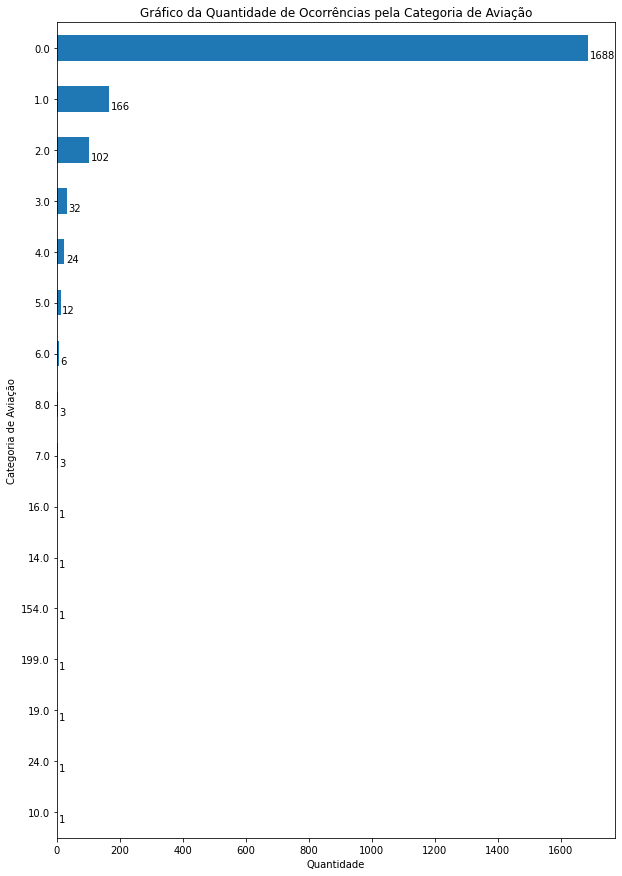

In [280]:
aeronaves['quantidade_fatalidades'].fillna(0, inplace=True)
qtde_fatalidade = aeronaves['quantidade_fatalidades'].value_counts().sort_values(ascending=True).plot(kind='barh', figsize=(10,15))

for p in qtde_fatalidade.patches:
    b=p.get_bbox()
    qtde_fatalidade.annotate("{:.0f}".format(b.x1 + b.x0), (p.get_x() + p.get_width() + 5, p.get_y() + 0.05))

plt.xlabel('Quantidade')
plt.ylabel('Categoria de Aviação')
plt.title('Gráfico da Quantidade de Ocorrências pela Categoria de Aviação')
plt.show()

Felizmente o número de vítimas nos acidentes é baixo. Cerca de 80% não há vítimas fatais. Alguns números chamam atenção pela quantidade de vítimas, como por exemplo o número 199 e 154. Provavelmente, trata-se de vôos em operação regular comercial. Podemos checar cruzando os dados da aeronave com os detalhes da ocorrência e investigar que ocasião deixou tantas vítimas.

In [288]:
aeronaves[aeronaves['quantidade_fatalidades']> 100]

,codigo_aeronave,codigo_ocorrencia,matricula,codigo_operador,equipamento,fabricante,modelo,tipo_motor,quantidade_motores,peso_maximo_decolagem,...,pais_registro,categoria_registro,categoria_aviacao,origem_voo,destino_voo,fase_operacao,tipo_operacao,nivel_dano,quantidade_fatalidades,dia_extracao
620,9280,29859,PRMBK,4834,AVIÃO,AIRBUS INDUSTRIE,A320-233,JATO,2.0,77000,...,BRASIL,TPR,REGULAR,SBPA,SBSP,POUSO,REGULAR,DESTRUÍDA,199.0,2016-07-30
638,9330,30375,PRGTD,2327,AVIÃO,BOEING COMPANY,737-8EH,JATO,2.0,79000,...,BRASIL,TPR,REGULAR,SBEG,SBBR,CRUZEIRO,REGULAR,DESTRUÍDA,154.0,2016-07-30


In [297]:
ocorrencias[ocorrencias['codigo_ocorrencia'] == 30375]

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao,ano_ocorrencia
855,30375,ACIDENTE,COLISÃO DE AERONAVES EM VOO,PEIXOTO DE AZEVEDO,MT,BRASIL,****,2006-09-29,19:56:00,SIM,CENIPA,FINALIZADA,A-022/CENIPA/2008,1.0,2008-12-08,68,2,NaN,2016-07-30,2006


O primeiro foi a colisão de um Boeing 737 do Vôo 1907 da Gol que fazia a rota de Manaus ao Aeroporto do Galeão no Rio de Janeiro. No caminho o avião se chocou com o Jato Embraer Legacy 600 enquanto sobrevoava o estado do Mato Grosso e caiu em uma região de mata fechada do município de Peixoto Azevedo - MT. O acidente foi o que teve mais vítimas na aviação brasileira até então, com 154 mortos. Mais informações no link a seguir: <https://pt.wikipedia.org/wiki/Voo_Gol_1907>

In [298]:
ocorrencias[ocorrencias['codigo_ocorrencia'] == 29859]

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao,ano_ocorrencia
1900,29859,ACIDENTE,PERDA DE CONTROLE NO SOLO,SÃO PAULO,SP,BRASIL,SBSP,2007-07-17,21:54:00,SIM,CENIPA,FINALIZADA,A-067/CENIPA/2009,1.0,2007-07-24,83,1,1.0,2016-07-30,2007


O outro grande acidente registrado no período de 2006 a 2015 foi o acidente com o Airbus 320 do Vôo 3054 da Tam (Atual LATAM) que partiu de Porto Alegre para São Paulo e que perdeu o controle durante a aterrisagem e colidiu diretamente com um prédio da Tam Express e um posto de combustíveis. Todos os 187 passageiros a bordo morreram e 12 pessoas que estavam em solo morreram também. Esse é o maior acidente da aviação brasileira. 

## Conclusões

Aviões apesar de serem um meio de transporte bastante seguro, estão sujeitos à diversas falhas de natureza humana ou mecânica. Entretanto, o volume de acidentes e incidentes é infinitamente menor em relação à quantidade de vôos que não possuem ocorrências. Cerca de 1700 das 2000 ocorrencias analisadas não tiveram vítimas. 

A título de comparação podemos ver que no ano de 2021 tivemos 40 mil mortes em acidentes de trânsito somente no Brasil. Ou seja, há somente uma falsa sensação de segurança quando se trata de veículos terrestres, mas isso pode ser tratado em outro estudo.
